<a href="https://colab.research.google.com/github/savindiperera/Customer_churn_prediction/blob/main/churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
!pip install pandas numpy matplotlib seaborn scikit-learn

In [36]:
!mkdir Customer_churn_prediction
%cd Customer_churn_prediction


/content/Customer_churn_prediction


In [37]:
!ls

churn.ipynb


In [38]:
!git init
!git config --global user.email "savindi.20241578@iit.ac.lk"
!git config --global user.name "savindiperera"

hint: Using 'master' as the name for the initial branch. This default branch name
hint: is subject to change. To configure the initial branch name to use in all
hint: of your new repositories, which will suppress this warning, call:
hint: 
hint: 	git config --global init.defaultBranch <name>
hint: 
hint: Names commonly chosen instead of 'master' are 'main', 'trunk' and
hint: 'development'. The just-created branch can be renamed via this command:
hint: 
hint: 	git branch -m <name>
Initialized empty Git repository in /content/Customer_churn_prediction/.git/


In [2]:
import pandas as pd

#Load dataset
df = pd.read_csv("/content/drive/MyDrive/MLCW/telco_churn.csv")

#Show first 5 rows
print(df.head())

#Show dataset shape (rows, columns)
print(df.shape)


   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract Pape

In [21]:
#Column names
print(df.columns)

#Data types
print(df.dtypes)

#Missing values
print(df.isnull().sum())

#Statistical summary
print(df.describe())


Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')
customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object
customerID       

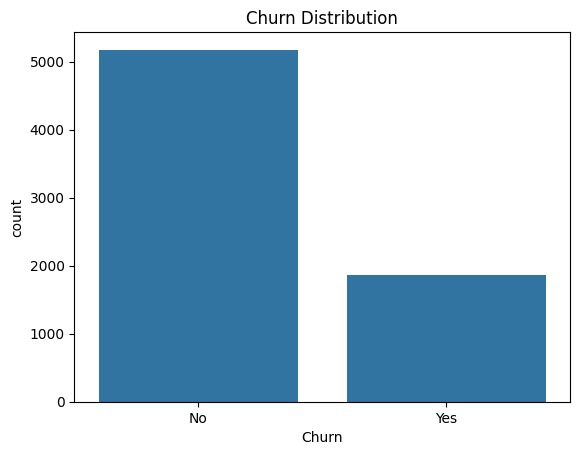

In [22]:
#Churn Distribution
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(x="Churn", data=df)
plt.title("Churn Distribution")
plt.show()


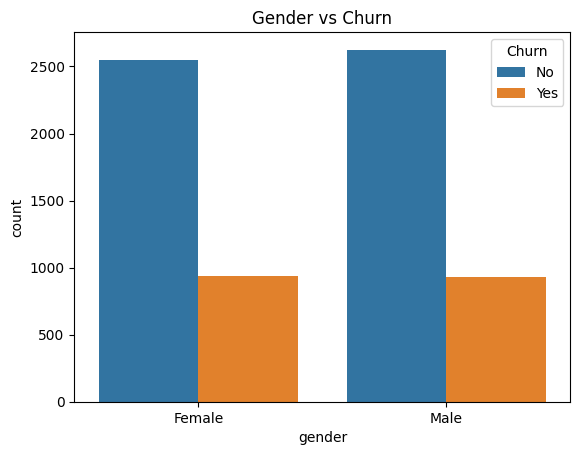

In [23]:
#Gender vs Churn
sns.countplot(x="gender", hue="Churn", data=df)
plt.title("Gender vs Churn")
plt.show()


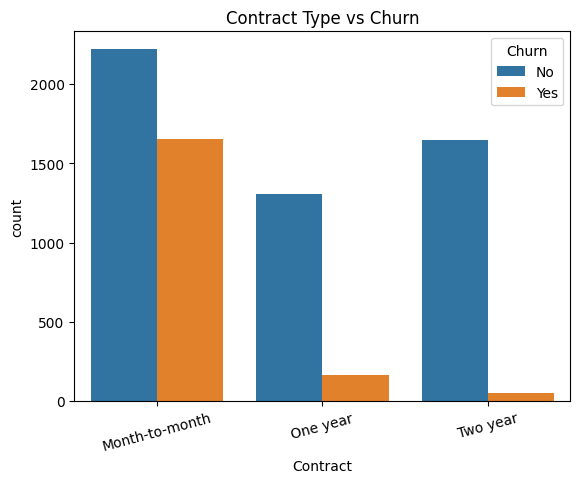

In [24]:
#Contract Type vs Churn
sns.countplot(x="Contract", hue="Churn", data=df)
plt.title("Contract Type vs Churn")
plt.xticks(rotation=15)
plt.show()


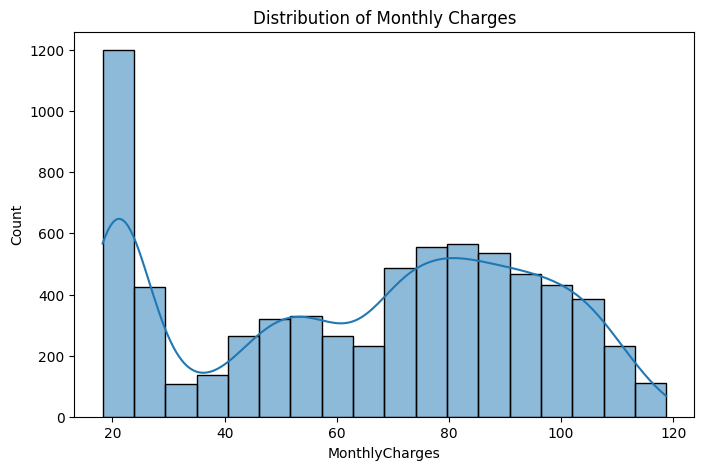

In [25]:
#Monthly Charges Distribution
plt.figure(figsize=(8,5))
sns.histplot(df["MonthlyCharges"], kde=True)
plt.title("Distribution of Monthly Charges")
plt.show()


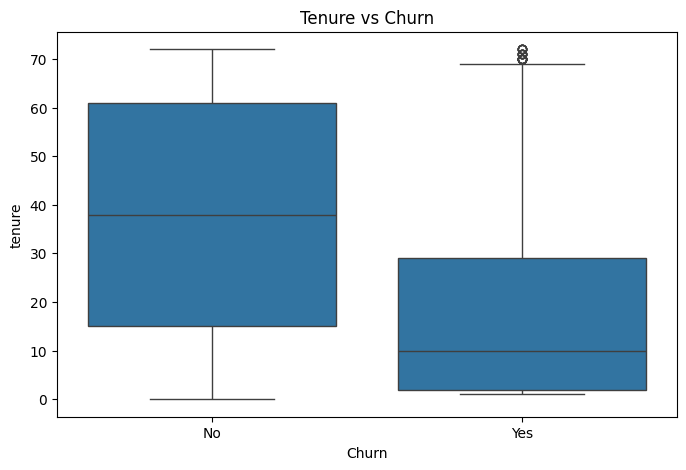

In [26]:
#Tenure vs Churn
plt.figure(figsize=(8,5))
sns.boxplot(x="Churn", y="tenure", data=df)
plt.title("Tenure vs Churn")
plt.show()


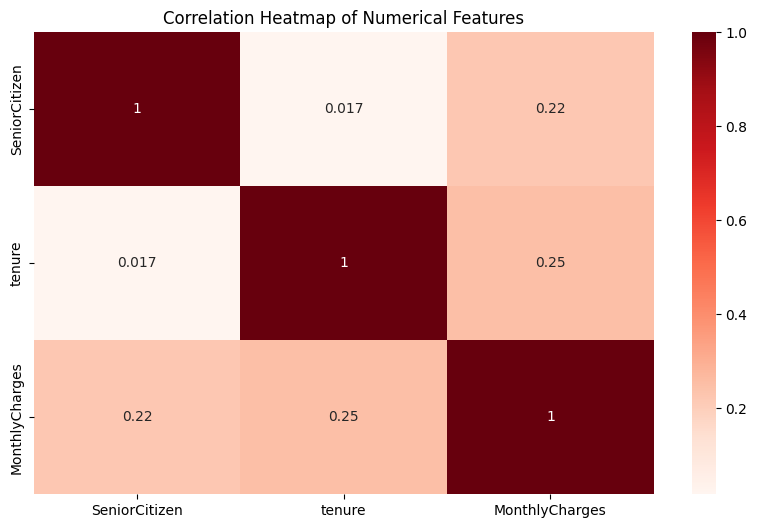

In [27]:
#Check correlations
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="Reds")
plt.title("Correlation Heatmap of Numerical Features")
plt.show()


In [3]:
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors='coerce')


In [29]:
df.isnull().sum()


,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [2]:
!pip install -q imbalanced-learn scikit-learn pandas matplotlib seaborn plotly tensorflow joblib

# Remove if any previous repo exists
!rm -rf Customer_churn_prediction

# Clone your repo
!git clone https://github.com/savindiperera/Customer_churn_prediction.git

# List files
!ls -la Customer_churn_prediction


Cloning into 'Customer_churn_prediction'...
remote: Enumerating objects: 3, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (2/2), done.
remote: Total 3 (delta 0), reused 3 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (3/3), 110.56 KiB | 943.00 KiB/s, done.
total 192
drwxr-xr-x 3 root root   4096 Dec 11 04:25 .
drwxr-xr-x 1 root root   4096 Dec 11 04:25 ..
-rw-r--r-- 1 root root 181781 Dec 11 04:25 churn.ipynb
drwxr-xr-x 8 root root   4096 Dec 11 04:25 .git


In [10]:
#Detect CSV and load dataset
repo_path = "/content/Customer_churn_prediction"
DATA_FILENAME = None
csvs = [f for f in os.listdir(repo_path) if f.lower().endswith('.csv')]
...
df = pd.read_csv("/content/drive/MyDrive/MLCW/telco_churn.csv")


Columns: ['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']


<Axes: xlabel='Churn', ylabel='count'>

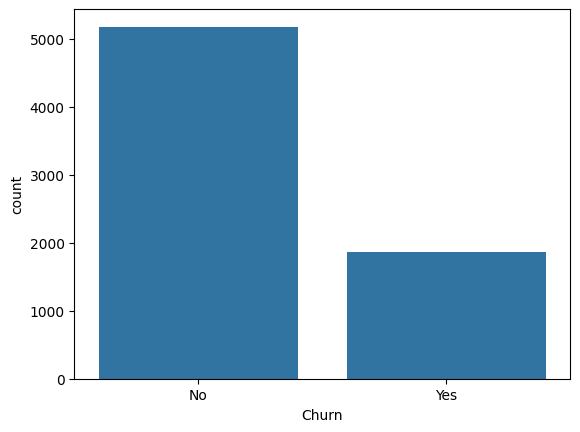

In [13]:
#Quick EDA & target detection
import seaborn as sns
import matplotlib.pyplot as plt

print("Columns:", list(df.columns))
candidates = [c for c in df.columns if 'churn' in c.lower()]
target = candidates[0] if candidates else 'Churn'
sns.countplot(x=target, data=df)


In [26]:
#Data cleaning
import numpy as np
import pandas as pd
df.columns = [c.strip() for c in df.columns]
if 'TotalCharges' in df.columns:
    df['TotalCharges'] = pd.to_numeric(df['TotalCharges'].replace(' ', np.nan))
    df['TotalCharges'] = df['TotalCharges'].fillna(df['MonthlyCharges'] * df.get('tenure', 1))
if df[target].dtype == object:
    df[target] = df[target].str.strip().map({'Yes':1,'No':0})
print(df[target].value_counts())
df.head()

Churn
0    5174
1    1869
Name: count, dtype: int64


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64
Number of duplicate rows: 0


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
customerID,7043,7043,3186-AJIEK,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gender,7043,2,Male,3555,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SeniorCitizen,7043.0,NaN,NaN,NaN,0.162147,0.368612,0.0,0.0,0.0,0.0,1.0
Partner,7043,2,No,3641,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Dependents,7043,2,No,4933,NaN,NaN,NaN,NaN,NaN,NaN,NaN
tenure,7043.0,NaN,NaN,NaN,32.371149,24.559481,0.0,9.0,29.0,55.0,72.0
PhoneService,7043,2,Yes,6361,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MultipleLines,7043,3,No,3390,NaN,NaN,NaN,NaN,NaN,NaN,NaN
InternetService,7043,3,Fiber optic,3096,NaN,NaN,NaN,NaN,NaN,NaN,NaN
OnlineSecurity,7043,3,No,3498,NaN,NaN,NaN,NaN,NaN,NaN,NaN


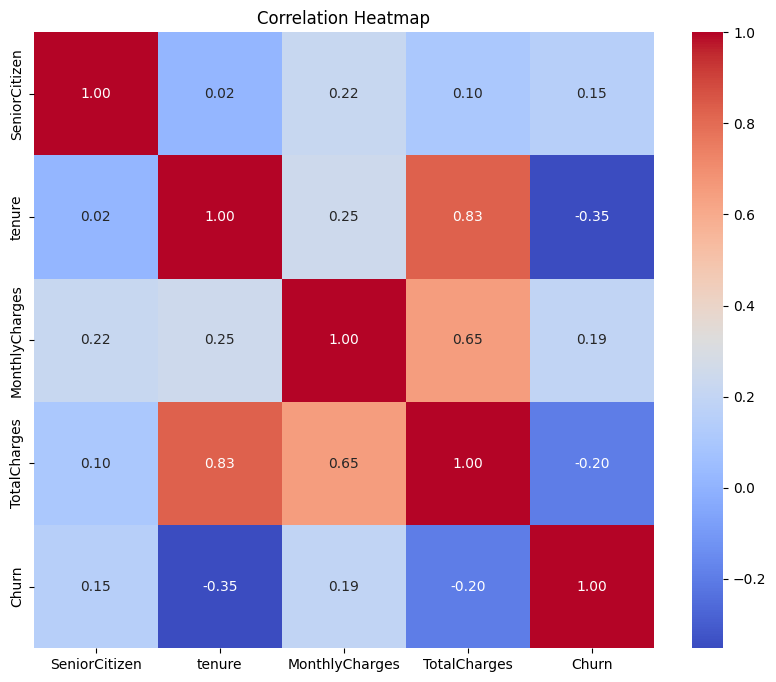

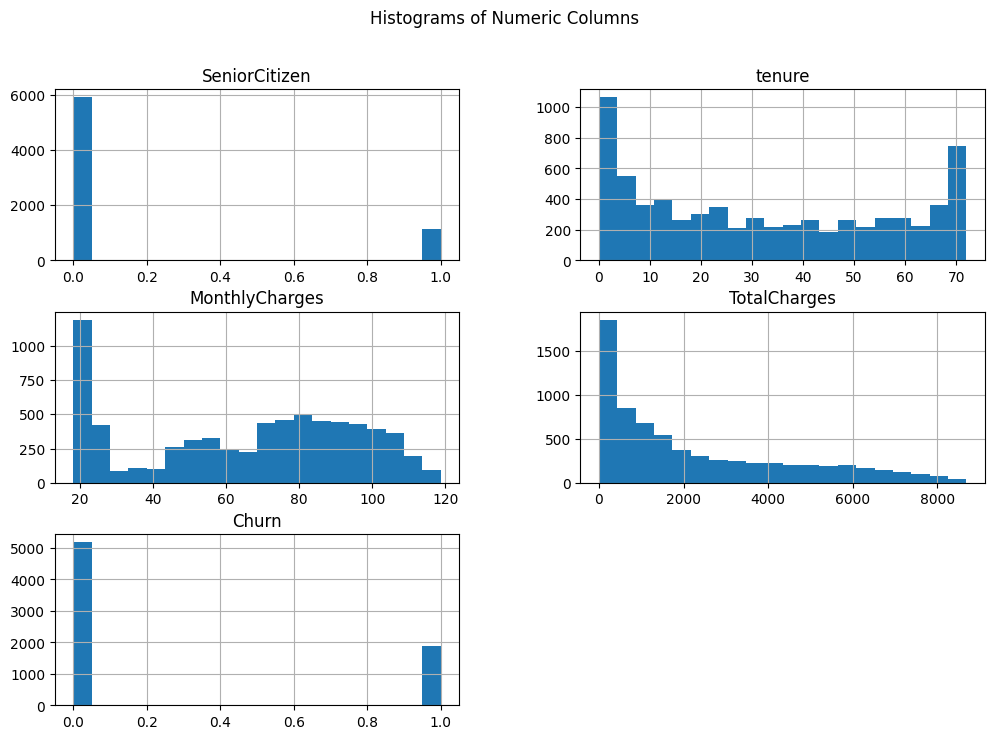

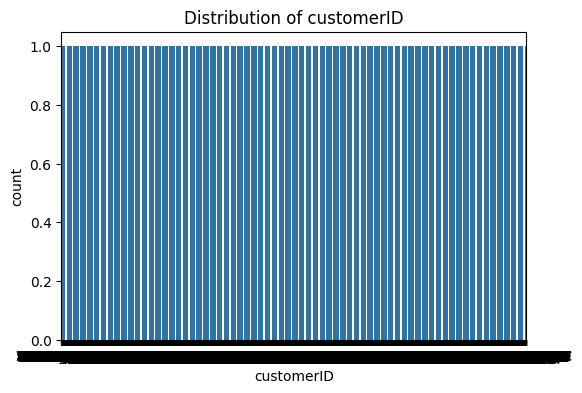

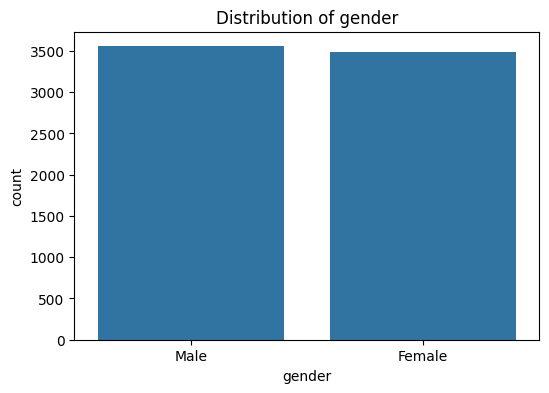

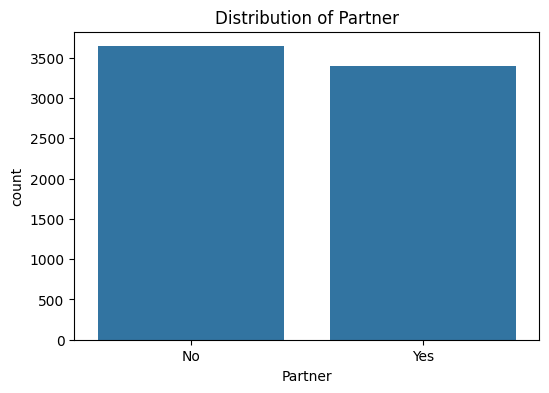

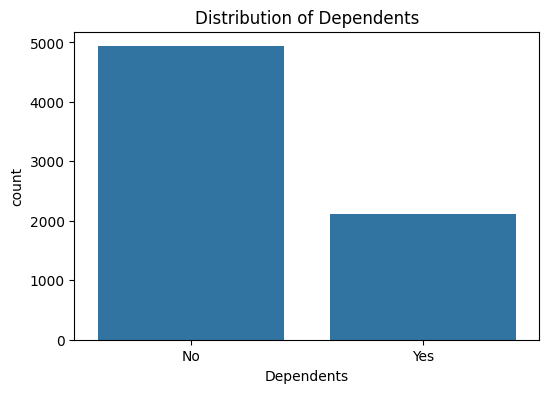

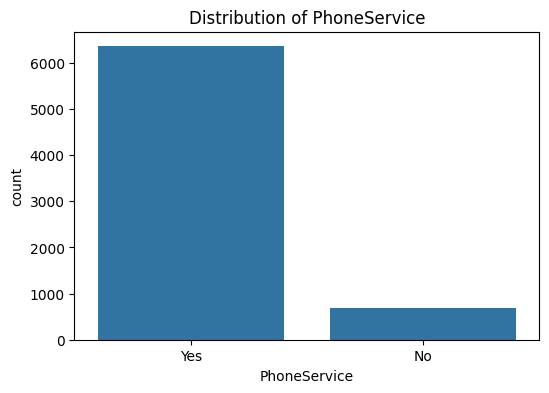

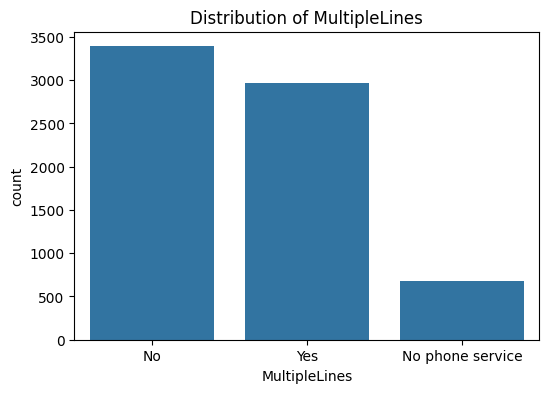

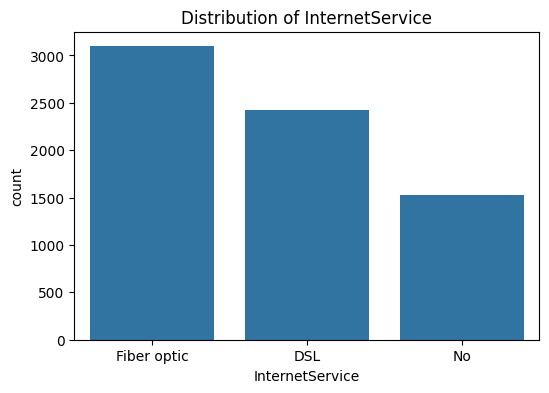

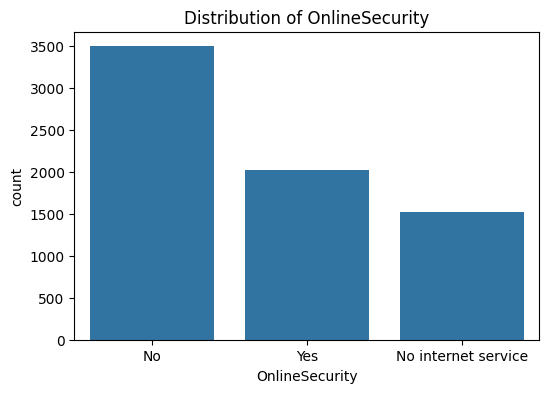

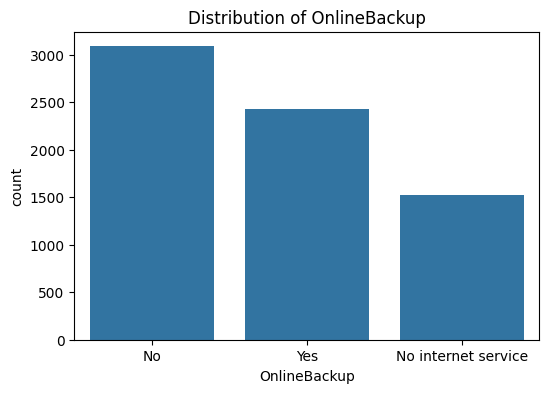

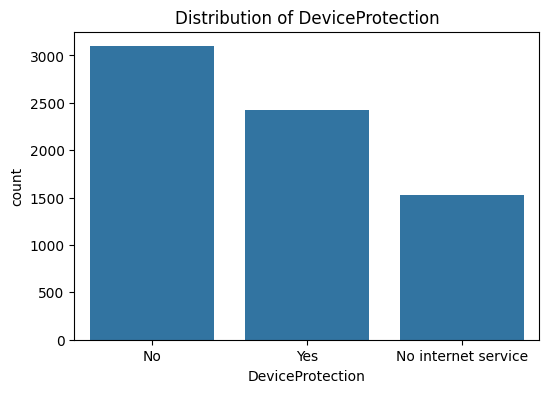

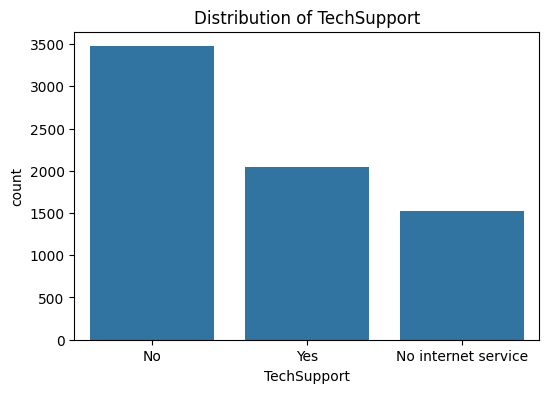

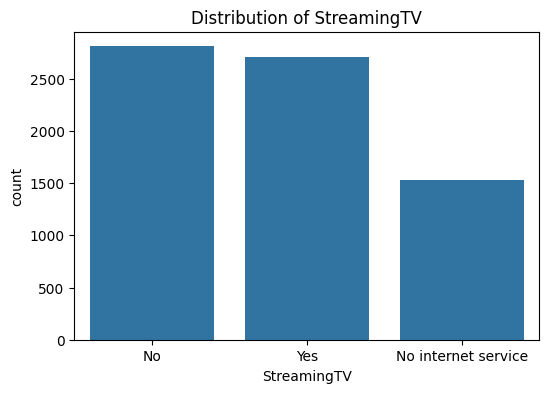

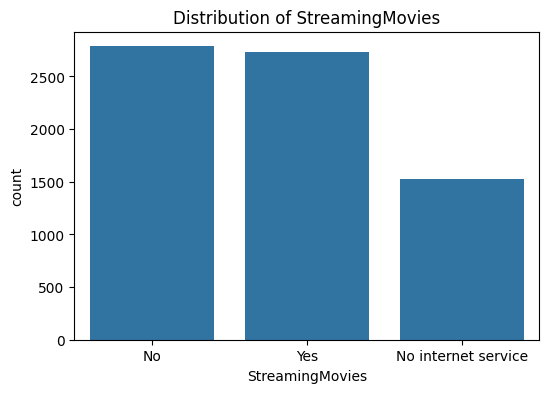

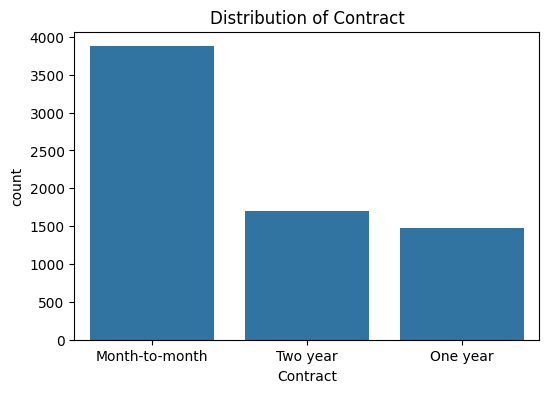

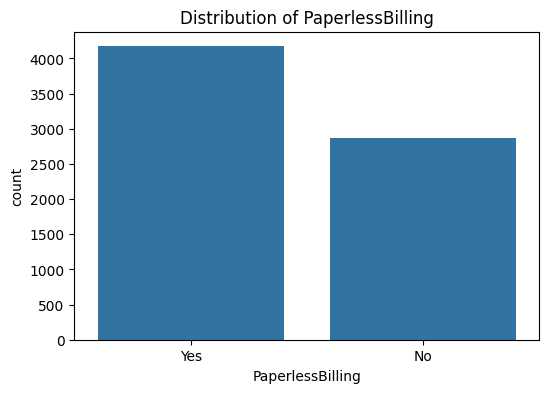

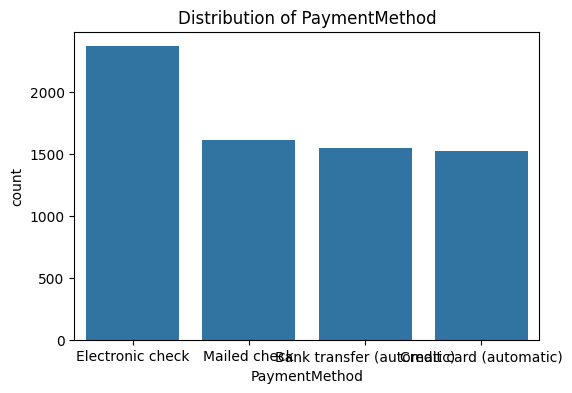

In [28]:
#Detailed EDA & visualizations
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Check for missing values
print(df.isnull().sum())

# Count duplicates
dups = df.duplicated().sum()
print(f"Number of duplicate rows: {dups}")

# Summary statistics
display(df.describe(include='all').T)

# Define numeric columns before using them in heatmap
num_cols = df.select_dtypes(include=np.number).columns.tolist()

# Correlation heatmap
plt.figure(figsize=(10,8))
sns.heatmap(df[num_cols].corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

# Histograms for numeric columns
df[num_cols].hist(figsize=(12,8), bins=20)
plt.suptitle("Histograms of Numeric Columns")
plt.show()

# Bar plots for categorical columns
cat_cols = df.select_dtypes(include='object').columns.tolist()
for col in cat_cols:
    plt.figure(figsize=(6,4))
    sns.countplot(x=col, data=df, order=df[col].value_counts().index)
    plt.title(f"Distribution of {col}")
    plt.show()



In [29]:
#Preprocessing pipeline (impute, encode, scale)
import numpy as np
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

# Define features and target
all_features = df.drop(columns=[target]).columns.tolist()
X = df[all_features]
y = df[target]

# Separate numeric and categorical features
num_features = X.select_dtypes(include=[np.number]).columns.tolist()
cat_features = [c for c in all_features if c not in num_features]

# Pipeline for numeric features: impute missing values (mean) + scale
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

# Pipeline for categorical features: impute missing values (most frequent) + one-hot encode
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine pipelines using ColumnTransformer
preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, num_features),
    ('cat', categorical_transformer, cat_features)
])

# Apply preprocessing to X
X_processed = preprocessor.fit_transform(X)

print("Preprocessing completed. Processed feature shape:", X_processed.shape)


Preprocessing completed. Processed feature shape: (7043, 7088)


In [31]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

#Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_processed,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print("Before SMOTE:")
print("Train class distribution:\n", y_train.value_counts())
print("Test class distribution:\n", y_test.value_counts())

#Apply SMOTE to training data
smote = SMOTE(random_state=42, k_neighbors=3)
X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train)

print("\nAfter SMOTE:")
print("Train class distribution (SMOTE):\n", y_train_sm.value_counts())


Before SMOTE:
Train class distribution:
 Churn
0    4139
1    1495
Name: count, dtype: int64
Test class distribution:
 Churn
0    1035
1     374
Name: count, dtype: int64

After SMOTE:
Train class distribution (SMOTE):
 Churn
0    4139
1    4139
Name: count, dtype: int64


In [32]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, roc_auc_score

#Define parameter grid for tuning
param_grid = {
    'max_depth': [3, 5, 7, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

#Initialize GridSearchCV with Decision Tree
grid = GridSearchCV(
    DecisionTreeClassifier(random_state=42),
    param_grid,
    cv=5,
    scoring='roc_auc',
    n_jobs=-1
)

#Fit on SMOTE training data
grid.fit(X_train_sm, y_train_sm)

#Best estimator
best_dt = grid.best_estimator_
print("Best parameters:", grid.best_params_)

#Predictions on test set
y_pred_dt = best_dt.predict(X_test)
y_prob_dt = best_dt.predict_proba(X_test)[:, 1]  # probability for class 1

#Evaluation
print("\nClassification Report:\n", classification_report(y_test, y_pred_dt))
print("ROC AUC Score:", roc_auc_score(y_test, y_prob_dt))


Best parameters: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5}

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.78      0.82      1035
           1       0.53      0.68      0.59       374

    accuracy                           0.75      1409
   macro avg       0.70      0.73      0.71      1409
weighted avg       0.78      0.75      0.76      1409

ROC AUC Score: 0.779286470846573


In [33]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

#Build neural network model
def build_model(input_dim):
    model = Sequential([
        Dense(128, activation='relu', input_dim=input_dim),
        Dropout(0.3),
        Dense(64, activation='relu'),
        Dropout(0.2),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer=Adam(learning_rate=0.001),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    return model

#Initialize model
input_dim = X_train_sm.shape[1]
model = build_model(input_dim)

#Train model
history = model.fit(
    X_train_sm, y_train_sm,
    validation_data=(X_test, y_test),
    epochs=25,
    batch_size=32,
    verbose=1
)

#Predict probabilities
y_prob_nn = model.predict(X_test).ravel()  # flatten to 1D array

#convert probabilities to class labels
y_pred_nn = (y_prob_nn >= 0.5).astype(int)


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/25
259/259 ━━━━━━━━━━━━━━━━━━━━ 9s 30ms/step - accuracy: 0.7556 - loss: 0.5265 - val_accuracy: 0.7417 - val_loss: 0.4849
Epoch 2/25
259/259 ━━━━━━━━━━━━━━━━━━━━ 7s 16ms/step - accuracy: 0.8387 - loss: 0.3795 - val_accuracy: 0.7842 - val_loss: 0.4490
Epoch 3/25
259/259 ━━━━━━━━━━━━━━━━━━━━ 6s 20ms/step - accuracy: 0.9737 - loss: 0.1032 - val_accuracy: 0.7360 - val_loss: 0.7087
Epoch 4/25
259/259 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - accuracy: 0.9988 - loss: 0.0113 - val_accuracy: 0.7750 - val_loss: 0.4999
Epoch 5/25
259/259 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - accuracy: 1.0000 - loss: 0.0036 - val_accuracy: 0.7381 - val_loss: 0.6080
Epoch 6/25
259/259 ━━━━━━━━━━━━━━━━━━━━ 5s 18ms/step - accuracy: 1.0000 - loss: 0.0015 - val_accuracy: 0.7353 - val_loss: 0.6638
Epoch 7/25
259/259 ━━━━━━━━━━━━━━━━━━━━ 5s 18ms/step - accuracy: 1.0000 - loss: 6.9996e-04 - val_accuracy: 0.7353 - val_loss: 0.7768
Epoch 8/25
259/259 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - accuracy: 1.0000 - loss: 4.4063e-04 - 

In [34]:
import os
import joblib
import pandas as pd

#Create models directory
models_dir = os.path.join(repo_path, 'models')
os.makedirs(models_dir, exist_ok=True)

#Save Decision Tree model
joblib.dump(best_dt, os.path.join(models_dir, 'decision_tree_best.joblib'))

#Save Neural Network model
model.save(os.path.join(models_dir, 'neural_network_model.h5'))

#Save results summary
#Example results dictionary (replace with your actual metrics)
results = {
    'Model': ['Decision Tree', 'Neural Network'],
    'ROC_AUC': [roc_auc_score(y_test, y_prob_dt), roc_auc_score(y_test, y_prob_nn)],
    'Accuracy': [
        (y_pred_dt == y_test).mean(),
        (y_pred_nn == y_test).mean()
    ]
}

#Convert to DataFrame and save
results_df = pd.DataFrame(results)
results_df.to_csv(os.path.join(repo_path,'results_summary.csv'), index=False)

print("Models and results saved successfully!")


Models and results saved successfully!


In [37]:
!git commit -m "2nd commit"

fatal: not a git repository (or any of the parent directories): .git


In [38]:
!git push -u origin main

fatal: not a git repository (or any of the parent directories): .git
